# Exploratory Data Analysis (EDA)

This notebook explores trends, relationships, and structural changes in Ghana’s banking sector and macroeconomic indicators.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("../data/processed/ghana_banking_master.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Monetary Policy Rate (%)             187 non-null    float64       
 1   Consumer Price Index, All Items      187 non-null    float64       
 2   USD Exchange Rate, monthly averages  187 non-null    float64       
 3   Total Liquidity (M2+)                187 non-null    float64       
 4   Gold Price (Realised Gold Price)     187 non-null    float64       
 5   Return on Assets                     187 non-null    float64       
 6   Non Performing Loan Ratio            187 non-null    float64       
 7   Capital Adequacy Ratio               187 non-null    float64       
 8   Date                                 187 non-null    datetime64[ns]
 9   GDP_Real                             187 non-null    float64       
dtypes: datetime64[

In [2]:
missing = df.isna().mean().sort_values(ascending=False)
missing


Monetary Policy Rate (%)               0.0
Consumer Price Index, All Items        0.0
USD Exchange Rate, monthly averages    0.0
Total Liquidity (M2+)                  0.0
Gold Price (Realised Gold Price)       0.0
Return on Assets                       0.0
Non Performing Loan Ratio              0.0
Capital Adequacy Ratio                 0.0
Date                                   0.0
GDP_Real                               0.0
dtype: float64

In [3]:
# Identifying periods of maximum credit risk
top_spikes = df.sort_values(by='Non Performing Loan Ratio', ascending=False).head(5)
print("Periods of Maximum Credit Risk:")
print(top_spikes[['Date', 'Non Performing Loan Ratio', 'Monetary Policy Rate (%)', 'USD Exchange Rate, monthly averages']])

Periods of Maximum Credit Risk:
          Date  Non Performing Loan Ratio  Monetary Policy Rate (%)  \
170 2024-03-01                      26.74                      29.0   
171 2024-04-01                      25.66                      29.0   
174 2024-07-01                      24.80                      29.0   
169 2024-02-01                      24.61                      29.0   
172 2024-05-01                      24.52                      29.0   

     USD Exchange Rate, monthly averages  
170                              12.6674  
171                              13.0381  
174                              14.7467  
169                              12.2301  
172                              13.7823  


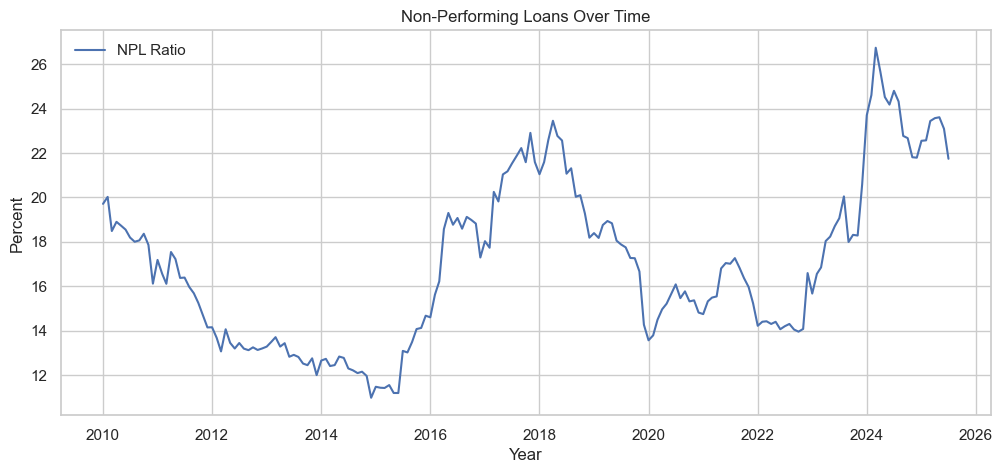

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Non Performing Loan Ratio'], label='NPL Ratio')
plt.title("Non-Performing Loans Over Time")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.legend()

plt.savefig('../figures/initial_npl_trend.png')
plt.show()

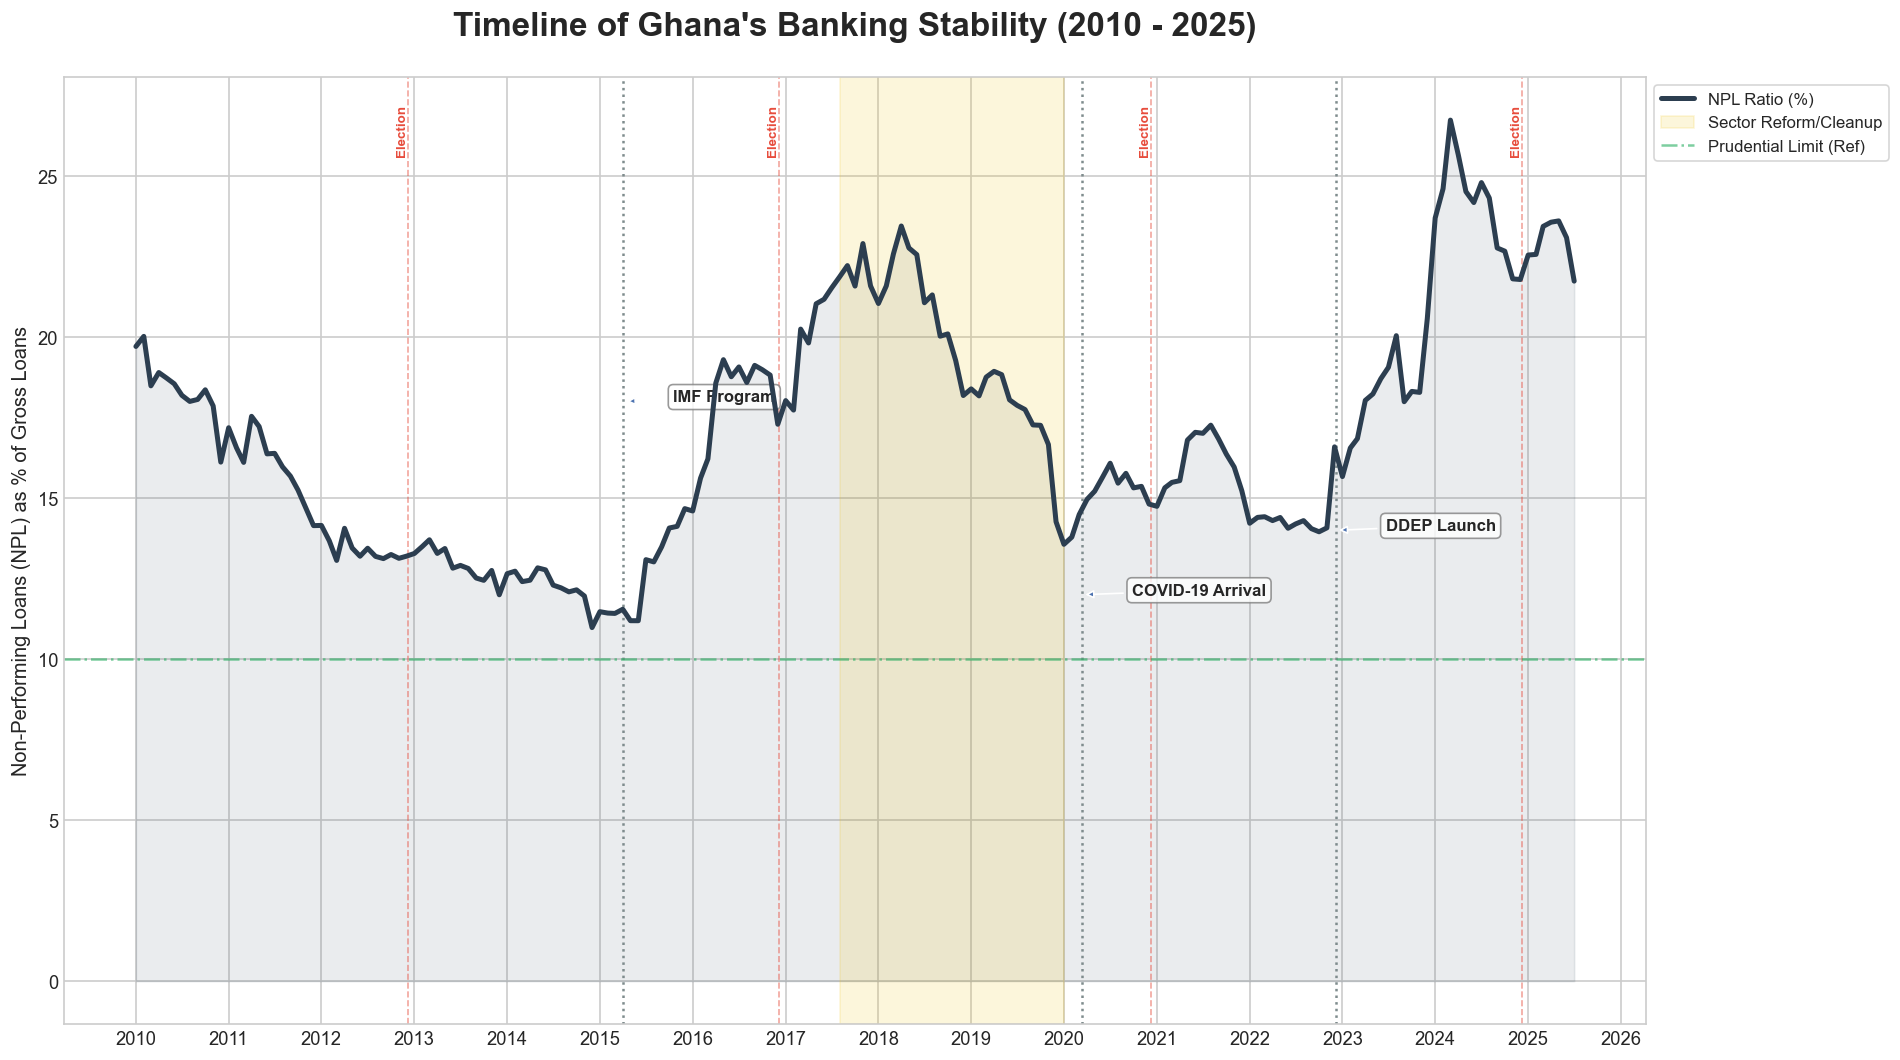

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 9), dpi=120) # Larger size for clarity

# 2. Main Plot
ax.plot(df['Date'], df['Non Performing Loan Ratio'], 
        color='#2C3E50', linewidth=3, label='NPL Ratio (%)', zorder=4)
ax.fill_between(df['Date'], df['Non Performing Loan Ratio'], color='#34495E', alpha=0.1)

# 3. strategic Eras
# Banking Cleanup (Span)
ax.axvspan(pd.to_datetime('2017-08-01'), pd.to_datetime('2019-12-31'), 
           color='#F1C40F', alpha=0.15, label='Sector Reform/Cleanup')

# 4. Events with staggered heights 
event_list = [
    ("IMF Program", '2015-04-03', 18),
    ("COVID-19 Arrival", '2020-03-12', 12),
    ("DDEP Launch", '2022-12-05', 14)
]

for label, date_str, y_pos in event_list:
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='#7F8C8D', linestyle=':', linewidth=1.5, zorder=2)
    ax.annotate(label, xy=(date, y_pos), xytext=(30, 0), 
                textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8))

# 5. Elections (Red dashed lines at the top)
election_dates = ['2012-12-07', '2016-12-07', '2020-12-07', '2024-12-07']
for d in election_dates:
    dt = pd.to_datetime(d)
    ax.axvline(dt, color='#E74C3C', linestyle='--', alpha=0.5, linewidth=1, zorder=1)
    ax.text(dt, ax.get_ylim()[1]*0.97, 'Election', color='#E74C3C', 
            fontsize=8, ha='right', va='top', rotation=90, fontweight='bold')

ax.set_title("Timeline of Ghana's Banking Stability (2010 - 2025)", fontsize=20, fontweight='bold', pad=25)
ax.set_ylabel("Non-Performing Loans (NPL) as % of Gross Loans", fontsize=12)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


ax.axhline(10, color='#27AE60', linestyle='-.', alpha=0.6, label='Prudential Limit (Ref)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=10)
plt.tight_layout()


plt.savefig('../figures/portfolio_final_timeline.png')

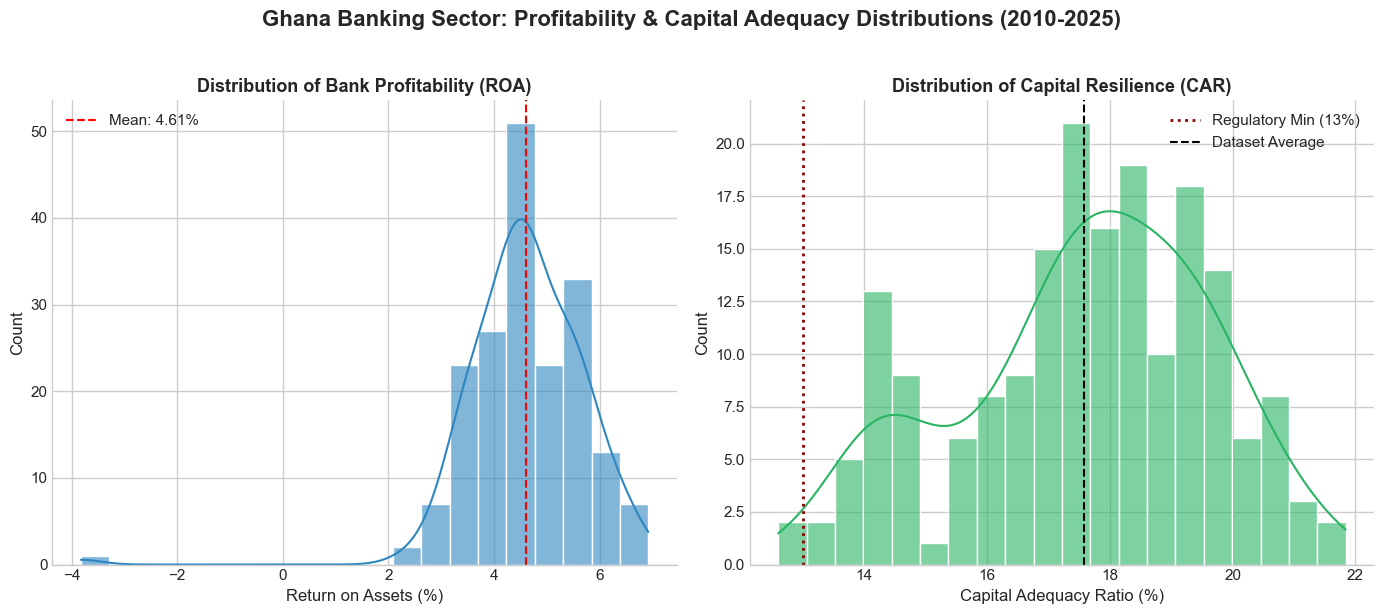

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# --- Return on Assets (ROA) ---
sns.histplot(df["Return on Assets"], kde=True, ax=axes[0], color='#2E86C1', bins=20, alpha=0.6)

# Mean and Median lines
roa_mean = df["Return on Assets"].mean()
axes[0].axvline(roa_mean, color='red', linestyle='--', label=f'Mean: {roa_mean:.2f}%')
axes[0].set_title("Distribution of Bank Profitability (ROA)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Return on Assets (%)")
axes[0].legend()

# --- Capital Adequacy Ratio (CAR) ---
sns.histplot(df["Capital Adequacy Ratio"], kde=True, ax=axes[1], color='#28B463', bins=20, alpha=0.6)

# Regulatory Benchmark (Ghana's typical min is 13%)
axes[1].axvline(13, color='darkred', linestyle=':', linewidth=2, label='Regulatory Min (13%)')
axes[1].axvline(df["Capital Adequacy Ratio"].mean(), color='black', linestyle='--', label='Dataset Average')

axes[1].set_title("Distribution of Capital Resilience (CAR)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Capital Adequacy Ratio (%)")
axes[1].legend()

# 2. main title 
plt.suptitle("Ghana Banking Sector: Profitability & Capital Adequacy Distributions (2010-2025)", 
             fontsize=16, fontweight='bold', y=1.02)
sns.despine()
plt.tight_layout()

os.makedirs('figures', exist_ok=True)
plt.savefig('../figures/banking_resilience_distributions.png', bbox_inches='tight')

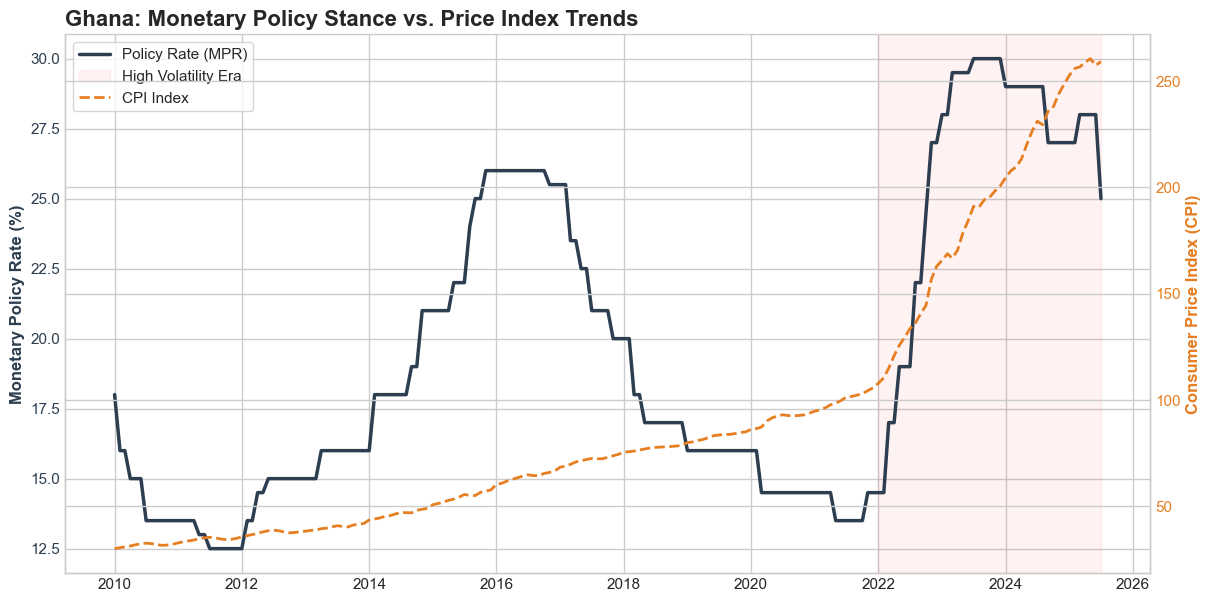

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import os


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)
color_mpr = '#2C3E50'  # Deep Navy
color_cpi = '#E67E22'  # Burnt Orange

# Policy Rate
ax1.plot(df["Date"], df["Monetary Policy Rate (%)"], 
         color=color_mpr, linewidth=2.5, label="Policy Rate (MPR)")
ax1.set_ylabel("Monetary Policy Rate (%)", color=color_mpr, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color_mpr)

# 3CPI 
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Consumer Price Index, All Items"], 
         color=color_cpi, linewidth=2, linestyle='--', label="CPI Index")
ax2.set_ylabel("Consumer Price Index (CPI)", color=color_cpi, fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color_cpi)

# "Shock" period (Post-2022)
ax1.axvspan(pd.to_datetime('2022-01-01'), df['Date'].max(), 
            color='red', alpha=0.05, label='High Volatility Era')

# Combined Legend & Styling
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', frameon=True)

plt.title("Ghana: Monetary Policy Stance vs. Price Index Trends", fontsize=16, fontweight='bold', loc='left')
sns.despine(ax=ax1, right=False)
plt.savefig('../figures/monetary_policy_dynamics.png', bbox_inches='tight')

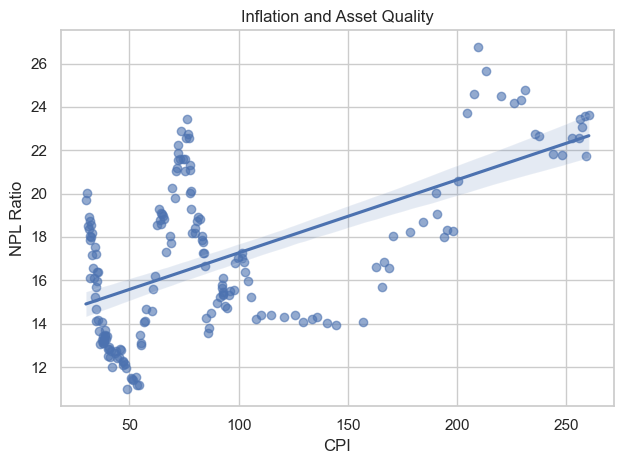

In [31]:
sns.regplot(x=df["Consumer Price Index, All Items"],
            y=df["Non Performing Loan Ratio"],
            scatter_kws={"alpha":0.6})

plt.title("Inflation and Asset Quality")
plt.xlabel("CPI")
plt.ylabel("NPL Ratio")
plt.tight_layout()

plt.savefig('../figures/npl_vs_cpi.png')
plt.show()

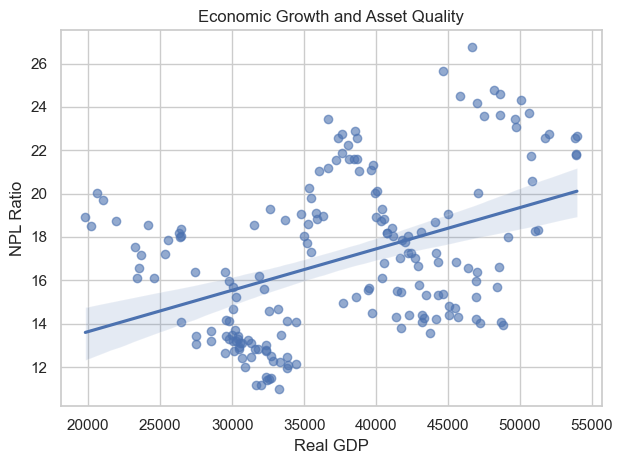

In [32]:
sns.regplot(x=df["GDP_Real"],
            y=df["Non Performing Loan Ratio"],
            scatter_kws={"alpha":0.6})

plt.title("Economic Growth and Asset Quality")
plt.xlabel("Real GDP")
plt.ylabel("NPL Ratio")
plt.tight_layout()

plt.savefig('../figures/npl_vs_gdp.png')
plt.show()

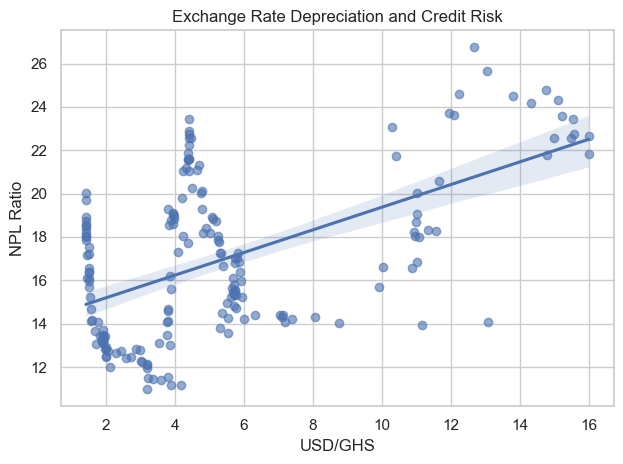

In [33]:
sns.regplot(x=df["USD Exchange Rate, monthly averages"],
            y=df["Non Performing Loan Ratio"],
            scatter_kws={"alpha":0.6})

plt.title("Exchange Rate Depreciation and Credit Risk")
plt.xlabel("USD/GHS")
plt.ylabel("NPL Ratio")
plt.tight_layout()

plt.savefig('../figures/npl_vs_usd_exchange.png')
plt.show()

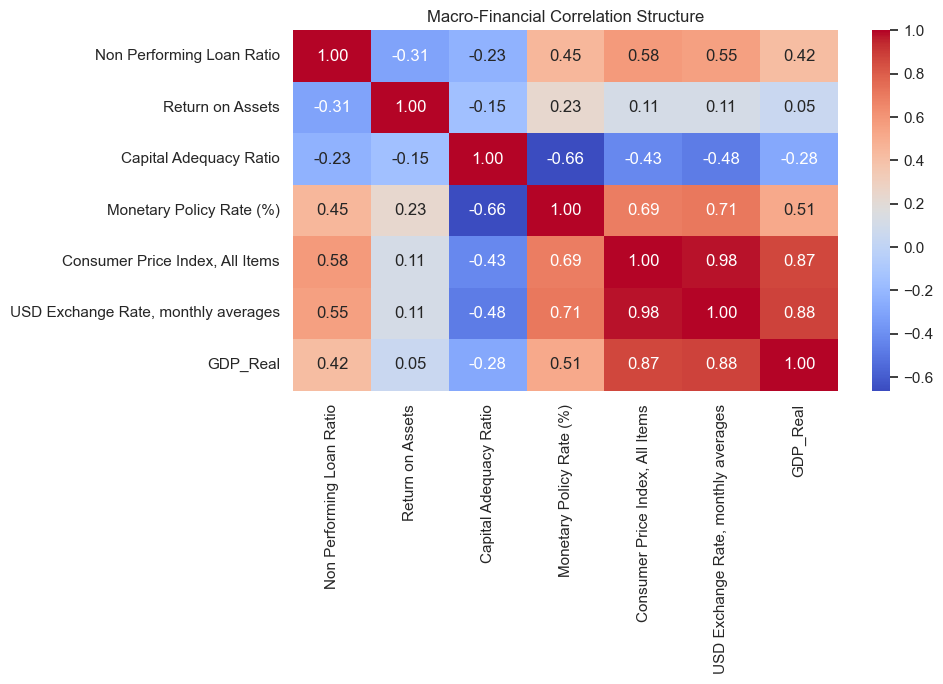

In [34]:
vars_for_corr = [
    "Non Performing Loan Ratio",
    "Return on Assets",
    "Capital Adequacy Ratio",
    "Monetary Policy Rate (%)",
    "Consumer Price Index, All Items",
    "USD Exchange Rate, monthly averages",
    "GDP_Real"
]

plt.figure(figsize=(10,7))
sns.heatmap(df[vars_for_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Macro-Financial Correlation Structure")
plt.tight_layout()


plt.savefig("../figures/correlation_matrix.png",)
plt.show()

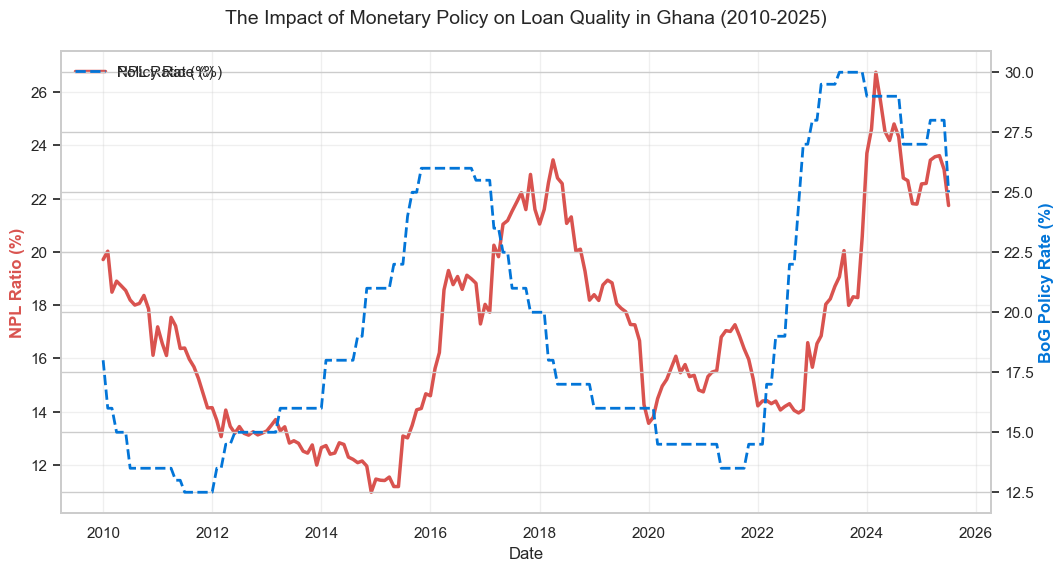

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# 3. Creating the first axis for Non Performing Loan Ratio
ax1 = sns.lineplot(data=df, x='Date', y='Non Performing Loan Ratio', color='#d9534f', label='NPL Ratio (%)', linewidth=2.5)
ax1.set_ylabel('NPL Ratio (%)', fontsize=12, fontweight='bold', color='#d9534f')

# 4. Creating the second axis for Monetary Policy Rate
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Date', y='Monetary Policy Rate (%)', color='#0275d8', label='Policy Rate (%)', linewidth=2, linestyle='--')
ax2.set_ylabel('BoG Policy Rate (%)', fontsize=12, fontweight='bold', color='#0275d8')

# 5. title and grid
plt.title('The Impact of Monetary Policy on Loan Quality in Ghana (2010-2025)', fontsize=14, pad=20)
ax1.grid(True, alpha=0.3)

# 6. Saving and showing the plot
plt.savefig('../figures/npl_vs_policy_rate.png', dpi=300, bbox_inches='tight')
plt.show()
